In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
customers=pd.read_csv('Customers.csv')
customers.head()


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [ ]:
products=pd.read_csv('Products.csv')
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [ ]:
transactions=pd.read_csv('Transactions.csv')
transactions.head()


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [ ]:
# Check for missing values
print("Missing Values:")
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

Missing Values:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [ ]:
print("\nCustomers Analysis:")
print(customers.info())
print(customers.describe(include='all'))


Customers Analysis:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3


In [ ]:
print("\nProducts Analysis:")
print(products.info())
print(products.describe())


Products Analysis:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000


In [ ]:
print("\nTransactions Analysis:")
print(transactions.info())
print(transactions.describe())


Transactions Analysis:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497

In [ ]:
# Preprocessing
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

# Merge datasets for analysis
merged_data = transactions.merge(products, on='ProductID').merge(customers, on='CustomerID')

In [ ]:

print("\nCategorical Summary\n")
print("Transactions:", transactions.select_dtypes(include='object').nunique())
print("Products:", products.select_dtypes(include='object').nunique())
print("Customers:", customers.select_dtypes(include='object').nunique())


Categorical Summary

Transactions: TransactionID    1000
CustomerID        199
ProductID         100
dtype: int64
Products: ProductID      100
ProductName     66
Category         4
dtype: int64
Customers: CustomerID      200
CustomerName    200
Region            4
dtype: int64


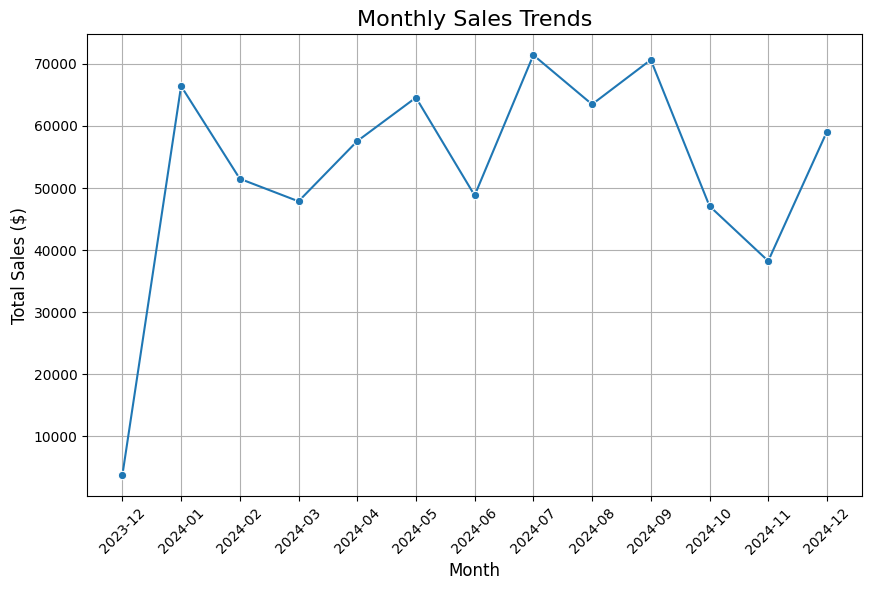

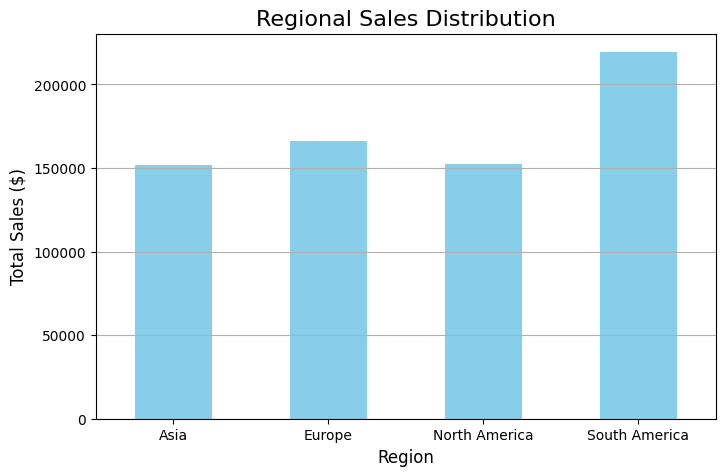

In [ ]:
# Sales Trends Over Time
sales_trends = transactions.groupby(transactions['TransactionDate'].dt.to_period('M')).agg({
    'TotalValue': 'sum',
    'TransactionID': 'count'
}).reset_index()
sales_trends['TransactionDate'] = sales_trends['TransactionDate'].astype(str)

# Plot sales trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_trends, x='TransactionDate', y='TotalValue', marker='o')
plt.title('Monthly Sales Trends', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Regional Sales Analysis
regional_sales = merged_data.groupby('Region').agg({
    'TotalValue': 'sum',
    'CustomerID': 'nunique'
}).rename(columns={'TotalValue': 'Total Sales', 'CustomerID': 'Unique Customers'})

# Plot regional sales
plt.figure(figsize=(8, 5))
regional_sales['Total Sales'].plot(kind='bar', color='skyblue')
plt.title('Regional Sales Distribution', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

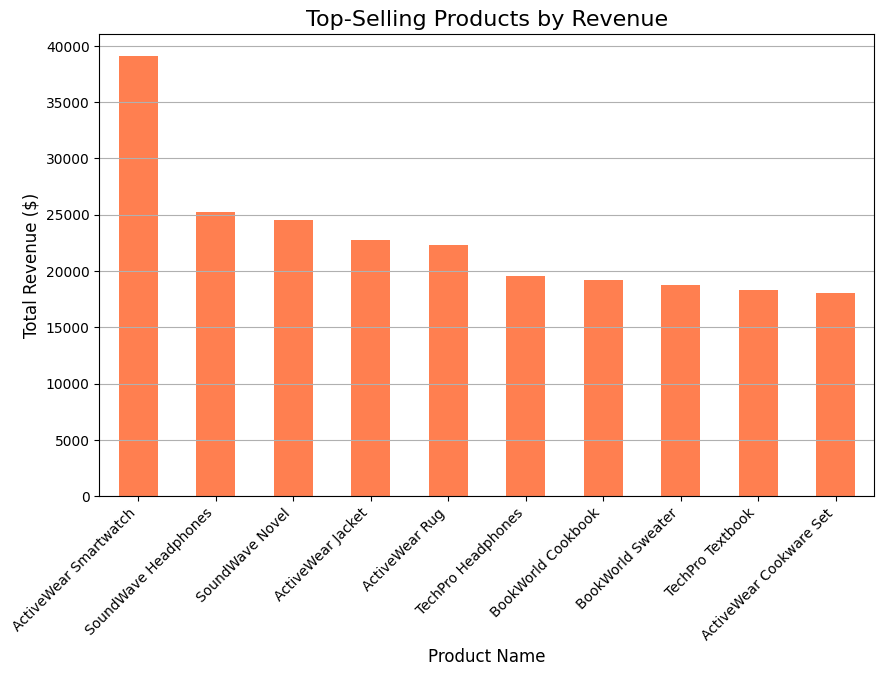

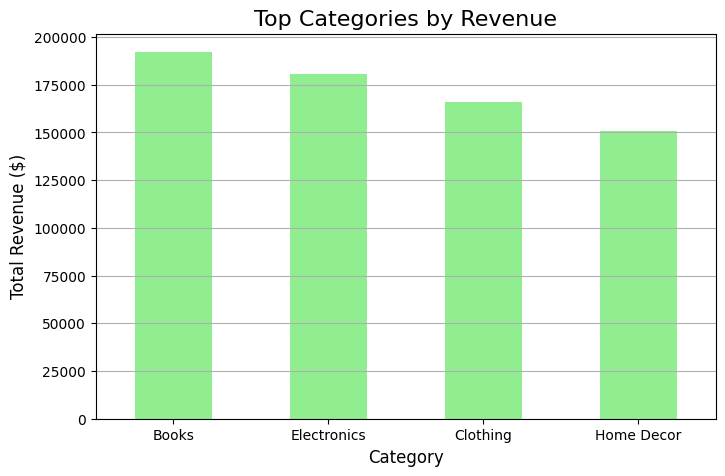

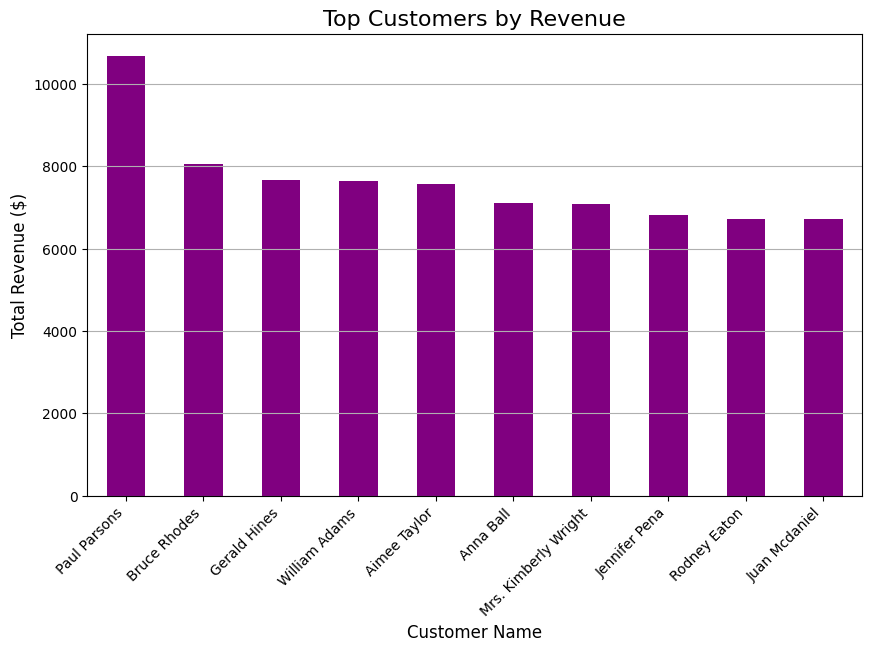


Regional Sales:
                Total Sales  Unique Customers
Region                                      
Asia             152074.97                44
Europe           166254.63                50
North America    152313.40                46
South America    219352.56                59

Top Products:
                          Quantity  TotalValue
ProductName                                  
ActiveWear Smartwatch         100    39096.97
SoundWave Headphones           97    25211.64
SoundWave Novel                58    24507.90
ActiveWear Jacket              76    22712.56
ActiveWear Rug                 79    22314.43
TechPro Headphones             45    19513.80
BookWorld Cookbook             48    19221.99
BookWorld Sweater              47    18743.79
TechPro Textbook               62    18267.96
ActiveWear Cookware Set        51    18083.73

Top Categories:
              Quantity  TotalValue
Category                         
Books             681   192147.47
Electronics       627   

In [ ]:
# Top-Selling Products
top_products = merged_data.groupby('ProductName').agg({
    'Quantity': 'sum',
    'TotalValue': 'sum'
}).sort_values(by='TotalValue', ascending=False).head(10)

# Plot top products
plt.figure(figsize=(10, 6))
top_products['TotalValue'].plot(kind='bar', color='coral')
plt.title('Top-Selling Products by Revenue', fontsize=16)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

# Top Categories
top_categories = merged_data.groupby('Category').agg({
    'Quantity': 'sum',
    'TotalValue': 'sum'
}).sort_values(by='TotalValue', ascending=False)

# Plot top categories
plt.figure(figsize=(8, 5))
top_categories['TotalValue'].plot(kind='bar', color='lightgreen')
plt.title('Top Categories by Revenue', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Top Customers
top_customers = merged_data.groupby('CustomerName').agg({
    'TotalValue': 'sum',
    'TransactionID': 'count'
}).sort_values(by='TotalValue', ascending=False).head(10)

# Plot top customers
plt.figure(figsize=(10, 6))
top_customers['TotalValue'].plot(kind='bar', color='purple')
plt.title('Top Customers by Revenue', fontsize=16)
plt.xlabel('Customer Name', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

# Insights
print("\nRegional Sales:\n", regional_sales)
print("\nTop Products:\n", top_products)
print("\nTop Categories:\n", top_categories)
print("\nTop Customers:\n", top_customers)
